# Text Analysis with Python

Textual analysis is an important tool in many fields today. With the raise of the internet and freely available data, it is easier than ever to download some text and analyse it. 

In this notebook, we will learn how to download some data from Twitter and use the pandas package to analyse it.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy

%matplotlib inline

## ideas
- Frequency of posts
- Most liked posts
- Clearing up the data
- Wordcloud

More ideas from 
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

In [2]:
# first load the dataset
# TODO explain what the dataset is
df = pd.read_csv("data/uoe_tweets_07022019.csv", index_col=0)
df.head()

,text,screen_name,created_at,retweet_count,favorite_count
0,RT @EdinUniStaff: Congratulations to the three...,EdinburghUni,2019-02-07 09:54:30,1,0
1,The Erasmus+ programme provides tangible benef...,EdinburghUni,2019-02-06 16:42:02,18,30
2,.@EdinburghUni values the opportunities Erasmu...,EdinburghUni,2019-02-06 11:57:46,13,38
3,A study of the Universe involving Edinburgh’s ...,EdinburghUni,2019-02-05 17:08:06,3,4
4,"Over 200 genes have been linked to depression,...",EdinburghUni,2019-02-05 16:20:02,10,19


One of the incredibly useful tools in text analysis is **lambda functions**. These are shorthand functions which you can use when you want to define a simple function but don't want to go through the whole process.

They have the format
```python
lambda arguments: expression
```
but are best seen through an example

In [3]:
# define normal functino
def square(x):
    return x ** 2

# define lambda function
f = lambda x: x**2

In [4]:
# Both have the same output
print(square(5))
print(f(5))

25
25


Now with that out of the way, let's begin doing some text analysis

## 1. Removing unnecessary data

From the dataset it is quite obvious that we don't need the `screen_name` column as all of the tweets are only from the @EdinburghUni profile. We can also consider simplifying the `created_at` column as we don't really need the exact time of publication.

Let's now exctract only the date of the tweet. We have the access the `datetime` object but don't worry about the details here.

In [5]:
# extract only date
df["date"] = df.created_at.str.slice(0,10)
df["date"] = pd.to_datetime(df.date)
df.head()

,text,screen_name,created_at,retweet_count,favorite_count,date
0,RT @EdinUniStaff: Congratulations to the three...,EdinburghUni,2019-02-07 09:54:30,1,0,2019-02-07
1,The Erasmus+ programme provides tangible benef...,EdinburghUni,2019-02-06 16:42:02,18,30,2019-02-06
2,.@EdinburghUni values the opportunities Erasmu...,EdinburghUni,2019-02-06 11:57:46,13,38,2019-02-06
3,A study of the Universe involving Edinburgh’s ...,EdinburghUni,2019-02-05 17:08:06,3,4,2019-02-05
4,"Over 200 genes have been linked to depression,...",EdinburghUni,2019-02-05 16:20:02,10,19,2019-02-05


### Exercise 1
Remove the `screen_name` and `created_at` columns from the dataframe above

In [6]:
# TODO remove solution
df = df.drop(["screen_name", "created_at"], axis=1)
df.head()

,text,retweet_count,favorite_count,date
0,RT @EdinUniStaff: Congratulations to the three...,1,0,2019-02-07
1,The Erasmus+ programme provides tangible benef...,18,30,2019-02-06
2,.@EdinburghUni values the opportunities Erasmu...,13,38,2019-02-06
3,A study of the Universe involving Edinburgh’s ...,3,4,2019-02-05
4,"Over 200 genes have been linked to depression,...",10,19,2019-02-05


# 2.  Number of words and charecters
Let's see how we can figure out the number of words and charecters with pandas.

In [7]:
# Counter number of words
df["word_count"] = df["text"].str.split().str.len()
df.head()

,text,retweet_count,favorite_count,date,word_count
0,RT @EdinUniStaff: Congratulations to the three...,1,0,2019-02-07,18
1,The Erasmus+ programme provides tangible benef...,18,30,2019-02-06,15
2,.@EdinburghUni values the opportunities Erasmu...,13,38,2019-02-06,16
3,A study of the Universe involving Edinburgh’s ...,3,4,2019-02-05,17
4,"Over 200 genes have been linked to depression,...",10,19,2019-02-05,20


As you can see it's very easy to do such things with the `str` methods that pandas offers!

You can find all such methods in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str). I would suggest keeping that link open for the rest of this notebook.

### Exercise 2
Count the number of charecters in each tweet and add the number of charecters as a column of the dataframe.

Remember that Twitter has a limit of 140 charecters per post.

In [8]:
# TODO - cleanup for exercise
df["char_count"] = df["text"].str.len()
df.head()

,text,retweet_count,favorite_count,date,word_count,char_count
0,RT @EdinUniStaff: Congratulations to the three...,1,0,2019-02-07,18,140
1,The Erasmus+ programme provides tangible benef...,18,30,2019-02-06,15,139
2,.@EdinburghUni values the opportunities Erasmu...,13,38,2019-02-06,16,140
3,A study of the Universe involving Edinburgh’s ...,3,4,2019-02-05,17,134
4,"Over 200 genes have been linked to depression,...",10,19,2019-02-05,20,140


# 3. Filtering the text
A critical stage of any text processing.

First, let us convert all charecters to lowercase. This avoid having multiple copies of the same workds. For example in the previous word counting exercise, the words `Edinburgh` and `edinburgh` would be considered two different words, whereas they are actually the same!

In [9]:
# convert to lowercase
df.text = df.text.str.lower()
df.head()

,text,retweet_count,favorite_count,date,word_count,char_count
0,rt @edinunistaff: congratulations to the three...,1,0,2019-02-07,18,140
1,the erasmus+ programme provides tangible benef...,18,30,2019-02-06,15,139
2,.@edinburghuni values the opportunities erasmu...,13,38,2019-02-06,16,140
3,a study of the universe involving edinburgh’s ...,3,4,2019-02-05,17,134
4,"over 200 genes have been linked to depression,...",10,19,2019-02-05,20,140


Now let's remove punctuation. It is possible to use the `.strip()` method but that doesn't catch all punctuation charecters like `%` or `#`. Instead we would like to use the `.replace` method combined with regular expressions.

### Exercise 3
Complete the code below in such a way that you catch as many punctuation charecters as you can!

For this you will have to use regular expressions. If you are not familiar with them you can have a look at this [webpage](https://stackoverflow.com/questions/4328500/how-can-i-strip-all-punctuation-from-a-string-in-javascript-using-regex)

*Note: the template code below stores the cleaned up text in a seperate column. Once you are happy with the filtering just put the filtered text in the `text` column*

In [10]:
df_test = df["text"].str.replace("put regex here", "")
df_test.head()

0    rt @edinunistaff: congratulations to the three...
1    the erasmus+ programme provides tangible benef...
2    .@edinburghuni values the opportunities erasmu...
3    a study of the universe involving edinburgh’s ...
4    over 200 genes have been linked to depression,...
Name: text, dtype: object

In [11]:
# solution
# TODO remove
df.text = df.text.str.replace("[^\w\s]", "")
df.head()

,text,retweet_count,favorite_count,date,word_count,char_count
0,rt edinunistaff congratulations to the three e...,1,0,2019-02-07,18,140
1,the erasmus programme provides tangible benefi...,18,30,2019-02-06,15,139
2,edinburghuni values the opportunities erasmus ...,13,38,2019-02-06,16,140
3,a study of the universe involving edinburghs p...,3,4,2019-02-05,17,134
4,over 200 genes have been linked to depression ...,10,19,2019-02-05,20,140


### Exercise 4

It would be interesting to see how frequently the university has made posts. Can you group all posts according to their date of publication and then create a plot through time of how many posts have been made each day.

You can use the `DataFrame.groupby` method to fund occurances. Don't forget to label the axis of your plot :)

In [17]:
# TODO remove solution
# group and get counts of posts
counts = df.groupby("date").count()
counts.head()

,text,retweet_count,favorite_count,word_count,char_count
date,,,,,
2014-08-20,2,2,2,2,2
2014-08-22,1,1,1,1,1
2014-08-23,1,1,1,1,1
2014-08-24,2,2,2,2,2
2014-08-25,2,2,2,2,2


Text(0, 0.5, 'Number of tweets')

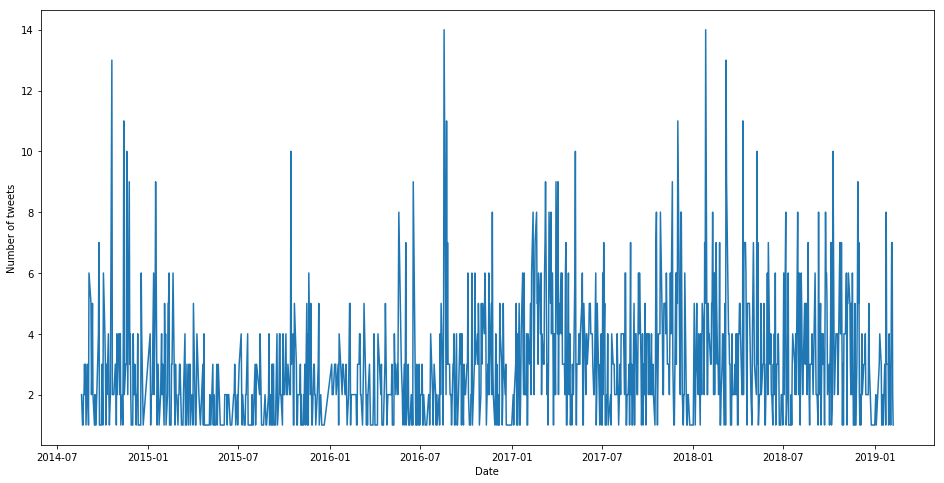

In [18]:
plt.figure(1, figsize=(16,8))
plt.plot(counts[["text"]])
plt.xlabel("Date")
plt.ylabel("Number of tweets")

### Exercise 5
Here we will identify the 10 most favourited posts. This can easily be done using the [`nlargest`](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html) method and then simply indexing into the original dataframe.

Find the 10 most popular posts, print them and see what they are about!

In [19]:
# TODO remove solution 
top10 = df.favorite_count.nlargest(10)
top10 = df.iloc[list(top10.index)]
top10

,text,retweet_count,favorite_count,date,word_count,char_count
2625,tickets now available for public talk by bolly...,1764,3725,2015-10-05,15,138
1434,congratulations to canadian pm justintrudeau w...,650,2553,2017-07-05,15,126
1320,scientists have developed a camera that can se...,546,798,2017-09-04,18,129
591,were ranked in world top 20 in the qs world un...,273,574,2018-06-06,18,138
1033,were number 2 on the timeshighered list of 10 ...,183,522,2018-01-03,18,135
1688,edinburgh is and will remain a proudly europea...,355,492,2017-03-29,15,130
1594,celebrate dance today for the internationaldan...,379,478,2017-04-29,15,130
2606,congratulations dr shah rukh khan honorary gra...,648,474,2015-10-15,14,125
1034,wishing all of our students staff amp friends ...,98,463,2018-01-01,18,121
965,bill gates says some of the worlds best resear...,195,448,2018-01-26,19,140


# 4. Wordclouds
Who doesn't like them right?

Wordclouds is a picture which consists of bundled words from a piece of text. The higher the occurance of the words, then the larger the text of the cloud is!

The easiest way to create wordclouds in Python is with the `wordcloud` package. Before using it, however, we must first download it. Run the cell below to do just that

In [20]:
# Creating a wordcloud
# first need to install
!pip install wordcloud

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Now that we are ready to go, let's import the package and creata a small wordcloud from arbitrary words

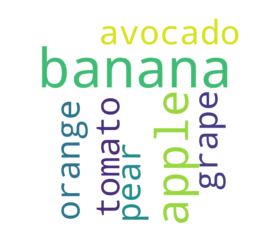

In [26]:
import wordcloud as ws

words = "avocado banana apple orange tomato banana apple banana grape pear"

wordcloud = ws.WordCloud(width=800, height=800, background_color="white").generate(words)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Exercise 6

Now that you know how to create a wordcloud, can you create one 

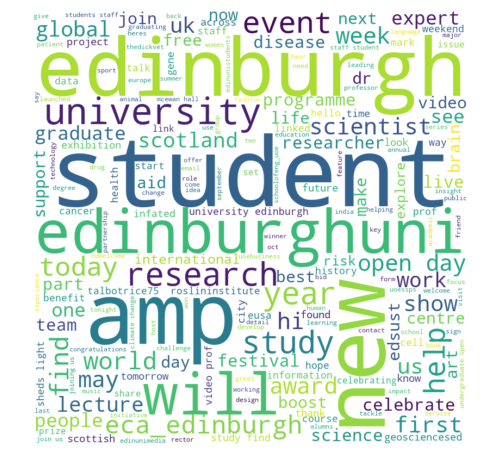

In [28]:
import wordcloud as ws

wordcloud = ws.WordCloud(width=800, height=800, background_color="white").generate(df.text.str.cat())
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# wordcloud.to_file("ds_wordcloud.png")